In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality-red.csv')

In [3]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [4]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


c:\Users\janak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


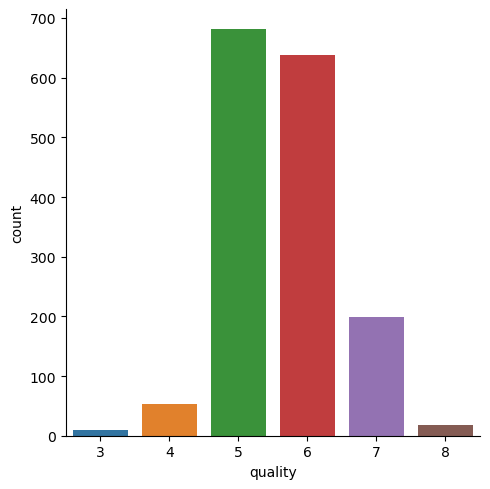

In [7]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

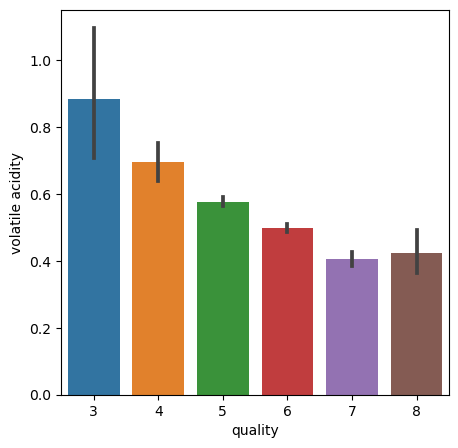

In [8]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

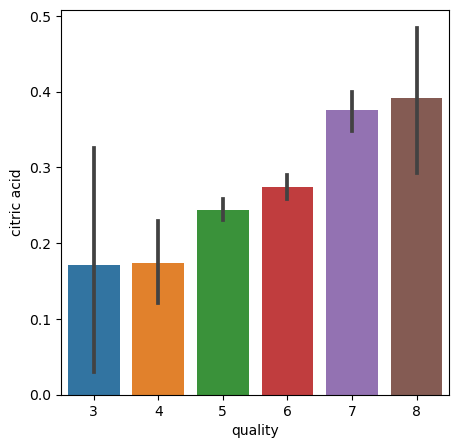

In [9]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

In [10]:
correlation = wine_dataset.corr()

<Axes: >

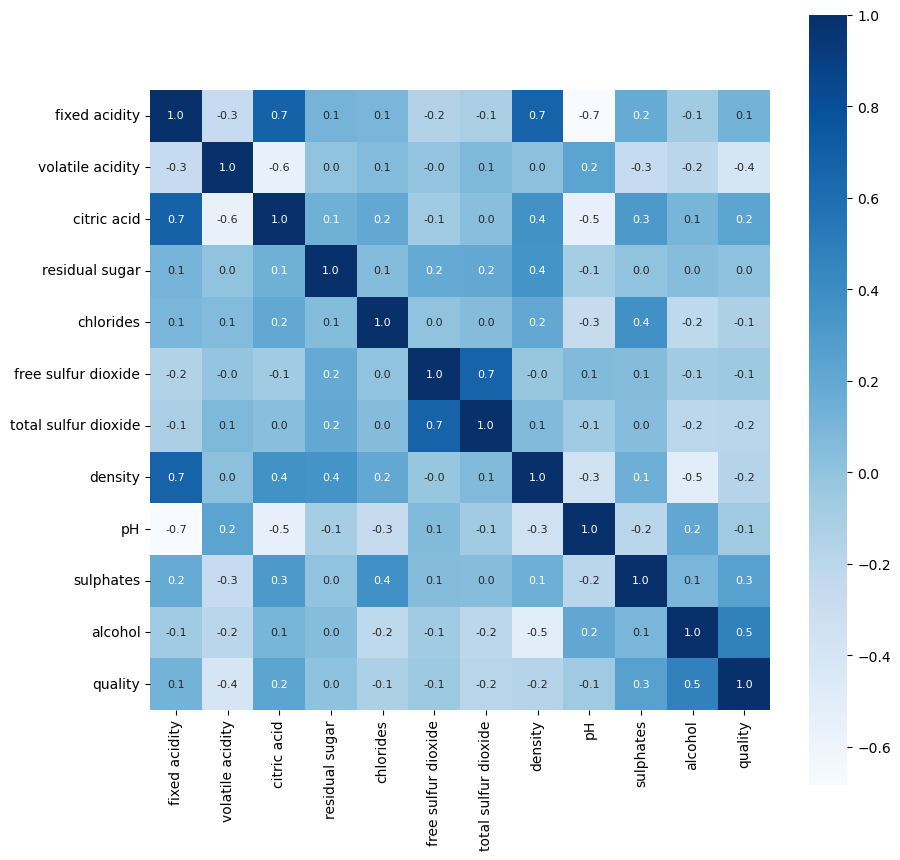

In [11]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [12]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [13]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [15]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [16]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [17]:

# Initialize SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, Y_train)

# Predict on test data
X_test_prediction_svm = svm_model.predict(X_test)

# Accuracy on test data using SVM
test_data_accuracy_svm = accuracy_score(X_test_prediction_svm, Y_test)
print('Accuracy (SVM): ', test_data_accuracy_svm)

Accuracy (SVM):  0.884375


In [18]:

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, Y_train)

# Predict on test data
X_test_prediction_logreg = logreg_model.predict(X_test)

# Accuracy on test data using Logistic Regression
test_data_accuracy_logreg = accuracy_score(X_test_prediction_logreg, Y_test)
print('Accuracy (Logistic Regression): ', test_data_accuracy_logreg)


Accuracy (Logistic Regression):  0.896875


c:\Users\janak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model
gb_model.fit(X_train, Y_train)

# Predict on test data
X_test_prediction_gb = gb_model.predict(X_test)

# Accuracy on test data using Gradient Boosting
test_data_accuracy_gb = accuracy_score(X_test_prediction_gb, Y_test)
print('Accuracy (Gradient Boosting): ', test_data_accuracy_gb)

# Example prediction using Gradient Boosting
prediction_gb = gb_model.predict(input_data_reshaped)
print(prediction_gb)

if prediction_gb[0] == 1:
    print('Good Quality Wine (Gradient Boosting)')
else:
    print('Bad Quality Wine (Gradient Boosting)')

Accuracy (Gradient Boosting):  0.9375
[0]
Bad Quality Wine (Gradient Boosting)


c:\Users\janak\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [20]:

# List of models and their names
models = [
    ("Random Forest", model),
    ("SVM", svm_model),
    ("Logistic Regression", logreg_model),
    ("Gradient Boosting", gb_model)
]

# Create a dictionary to store evaluation metrics
evaluation_metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

# Evaluate each model and collect metrics
for model_name, model in models:
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred, output_dict=True)
    precision = report["1"]["precision"]  # Precision for the "Good Quality Wine" class (1)
    recall = report["1"]["recall"]  # Recall for the "Good Quality Wine" class (1)
    f1_score = report["1"]["f1-score"]  # F1 score for the "Good Quality Wine" class (1)
    
    # Append metrics to the dictionary
    evaluation_metrics["Model"].append(model_name)
    evaluation_metrics["Accuracy"].append(accuracy)
    evaluation_metrics["Precision"].append(precision)
    evaluation_metrics["Recall"].append(recall)
    evaluation_metrics["F1 Score"].append(f1_score)

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(evaluation_metrics)

# Print the metrics DataFrame
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.934375   0.833333  0.540541  0.655738
1                  SVM  0.884375   0.000000  0.000000  0.000000
2  Logistic Regression  0.896875   0.642857  0.243243  0.352941
3    Gradient Boosting  0.937500   0.774194  0.648649  0.705882


c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


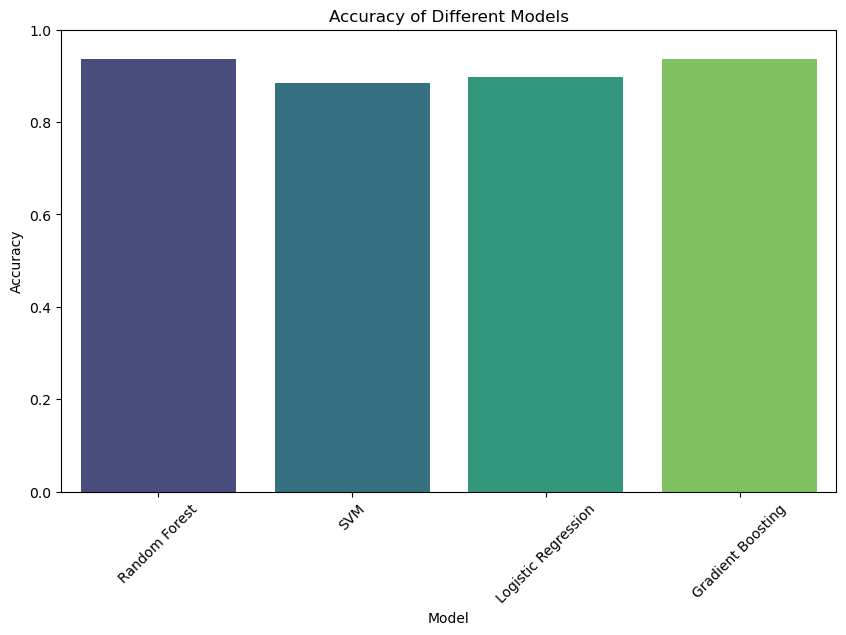

In [21]:

# List of models and their names
models = [
    ("Random Forest", model),
    ("SVM", svm_model),
    ("Logistic Regression", logreg_model),
    ("Gradient Boosting", gb_model)
]

# Create lists to store model names and corresponding accuracies
model_names = []
accuracies = []

# Evaluate each model and collect accuracies
for model_name, model in models:
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    
    # Append model name and accuracy to lists
    model_names.append(model_name)
    accuracies.append(accuracy)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Accuracy of Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


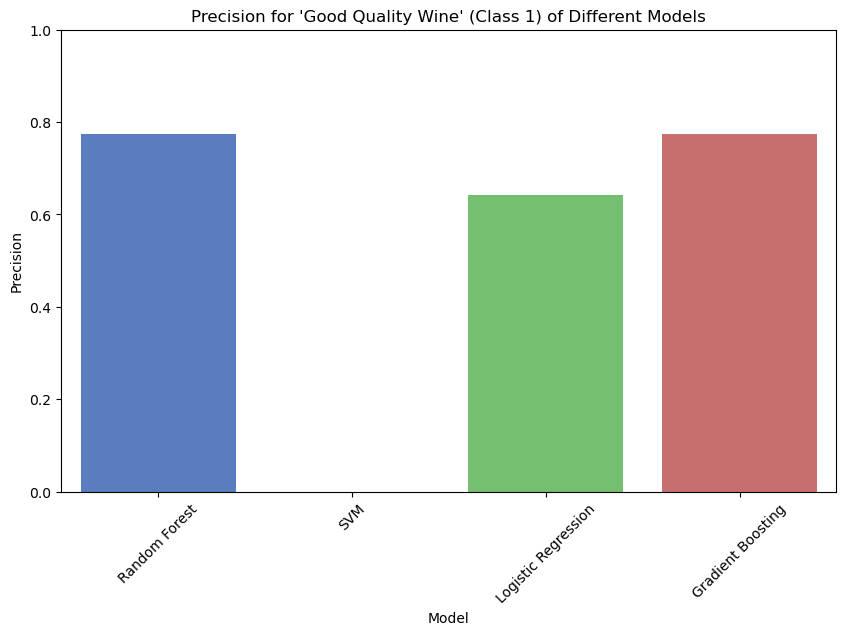

In [22]:

# List of models and their names
models = [
    ("Random Forest", model),
    ("SVM", svm_model),
    ("Logistic Regression", logreg_model),
    ("Gradient Boosting", gb_model)
]

# Create lists to store model names and corresponding precision scores
model_names = []
precisions = []

# Evaluate each model and collect precision scores for class 1 ("Good Quality Wine")
for model_name, model in models:
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate precision for class 1 ("Good Quality Wine")
    report = classification_report(Y_test, y_pred, output_dict=True)
    precision = report["1"]["precision"]  # Precision for class 1
    
    # Append model name and precision to lists
    model_names.append(model_name)
    precisions.append(precision)

# Plotting the precision graph
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=precisions, palette="muted")
plt.title("Precision for 'Good Quality Wine' (Class 1) of Different Models")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for precision values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


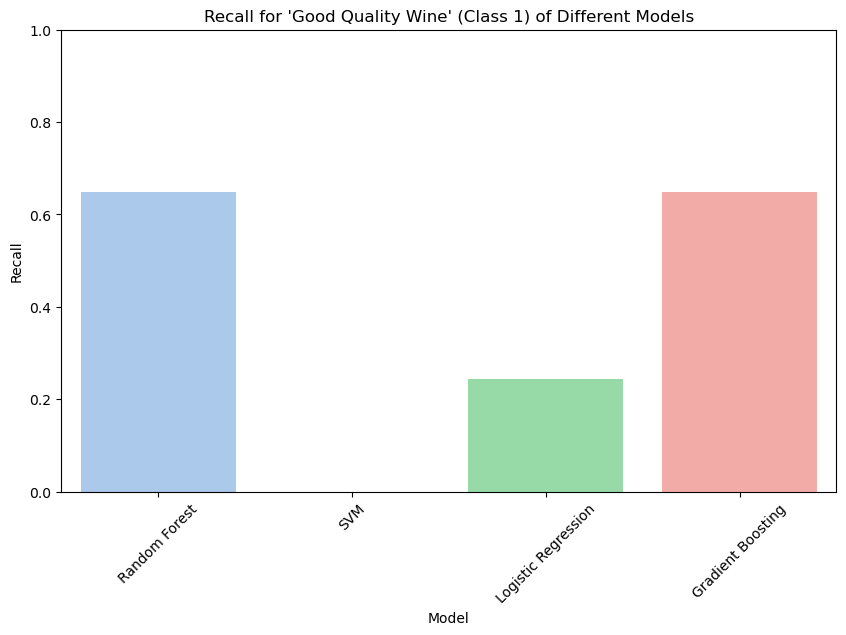

In [23]:


# List of models and their names
models = [
    ("Random Forest", model),
    ("SVM", svm_model),
    ("Logistic Regression", logreg_model),
    ("Gradient Boosting", gb_model)
]

# Create lists to store model names and corresponding recall scores
model_names = []
recalls = []

# Evaluate each model and collect recall scores for class 1 ("Good Quality Wine")
for model_name, model in models:
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate recall for class 1 ("Good Quality Wine")
    report = classification_report(Y_test, y_pred, output_dict=True)
    recall = report["1"]["recall"]  # Recall for class 1
    
    # Append model name and recall to lists
    model_names.append(model_name)
    recalls.append(recall)

# Plotting the recall graph
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=recalls, palette="pastel")
plt.title("Recall for 'Good Quality Wine' (Class 1) of Different Models")
plt.xlabel("Model")
plt.ylabel("Recall")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for recall values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


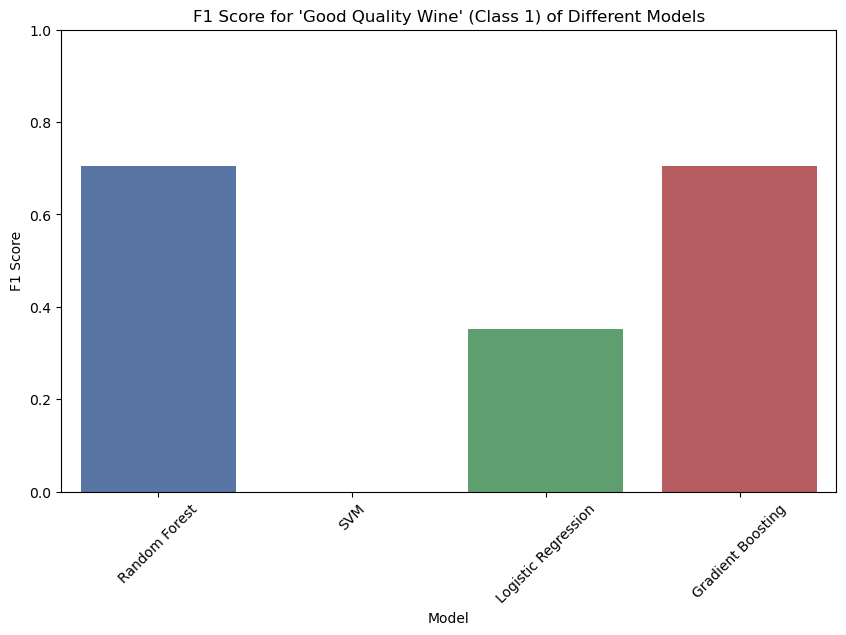

In [24]:


# List of models and their names
models = [
    ("Random Forest", model),
    ("SVM", svm_model),
    ("Logistic Regression", logreg_model),
    ("Gradient Boosting", gb_model)
]

# Create lists to store model names and corresponding F1 scores
model_names = []
f1_scores = []

# Evaluate each model and collect F1 scores for class 1 ("Good Quality Wine")
for model_name, model in models:
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate F1 score for class 1 ("Good Quality Wine")
    report = classification_report(Y_test, y_pred, output_dict=True)
    f1_score = report["1"]["f1-score"]  # F1 score for class 1
    
    # Append model name and F1 score to lists
    model_names.append(model_name)
    f1_scores.append(f1_score)

# Plotting the F1 score graph
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=f1_scores, palette="deep")
plt.title("F1 Score for 'Good Quality Wine' (Class 1) of Different Models")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for F1 scores
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
